In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

#### Utility functions
allows to calculate gamma and apply boosts to position and time

In [2]:
def gamma(beta):
    return(1-beta**2)**(-0.5)
def boost_x(x,ct,beta):
    return -gamma(beta)*beta*ct + gamma(beta)*x

def boost_ct(x,ct,beta):
    return -gamma(beta)*beta*x + gamma(beta)*ct

Create a class to store a spacetime event, as seen from some reference frame. This class should have a function to return a transformed Event, given an inertial reference frame to transform to. We can define worldlines as two connected events (a start and stop).

Also, create a class representing an inertial reference frame. For now, this is just a wrapper to hold the position and velocity of an IRF. While it may seem clunky to do it this way at the moment, it provides a useful framework to add more advanced tools at some point, such as the ability to transform one reference frame into another one, given both reference frames expressed in a third frame.

In [41]:
class Event:
    coordinates = [0,0]
    def __init__(self, ct = 0, position = 0):
        self.coordinates = [ct, position]
    
    def lorenzTransform(self, referenceFrame): #transform this event into frame referenceFrame. The assumption is that
        # both the event and referenceFrame are being observed from the same frame
        time = boost_ct(self.coordinates[1], self.coordinates[0], referenceFrame.velocity)
        position = boost_x(self.coordinates[1], self.coordinates[0], referenceFrame.velocity)
        return Event(time, position)
    
class IRF:
    initialPos = 0 #position at t = 0
    velocity = 0
    
    def __init__(self, position, velocity):
        self.initialPos = position
        self.velocity = velocity

Set up the world - The earth, and rocket should all be IRFs. Then, graph the spacetime diagram as seen from earth

The green line is the earth's worldline, blue is ship A, red is Ship B, and dotted is a beam of light

In [81]:
earth = IRF(0,0) #We're defining coordinates in the IRF of the earth
shipA = IRF(0, 0.4) #Ship A passes near earth at t = 0 with speed 0.4c

#define important spacetime events, from the perspective of earth
t_max = 20

earth_start = Event(0,0) # two points defining earth's worldline
earth_end = Event(0,t_max)

shipA_start = Event(0,0) # two points defining Ship A's worldline
shipA_end = Event(shipA.velocity * t_max, t_max)

shipB_start = Event(0,8) # two points defining Ship B's worldline
shipB_end = Event(0.9 * (t_max - 8), t_max)

lightBeam_start = Event(0,0) # two points defining a light beam worldline
lightBeam_end = Event(t_max, t_max)

#plot the spacetime diagram from the earth's perspective:

def plotTransformedPath(events, frame, modifiers = "b"): #transform every event into frame, and then connect all the events in spacetime
    modEvents = [event.lorenzTransform(frame) for event in events]
    plt.xlim(-22,22)
    plt.ylim(-1,22)
    plt.plot([i.coordinates[0] for i in modEvents], [i.coordinates[1] for i in modEvents], modifiers)
    plt.xlabel("distance (lm)")
    plt.ylabel("time * c (lm)")

Plot everything from the earth's perspective

<IPython.core.display.Javascript object>


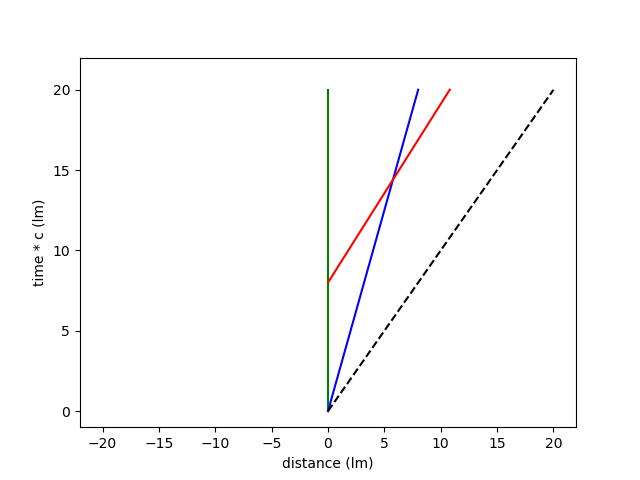

In [86]:
plotTransformedPath([earth_start, earth_end], earth, "g")
plotTransformedPath([shipA_start, shipA_end], earth, "b")
plotTransformedPath([shipB_start, shipB_end], earth, "r")
plotTransformedPath([lightBeam_start, lightBeam_end], earth, "k--")


Now, plot everything from the perspective of rocket A

<IPython.core.display.Javascript object>


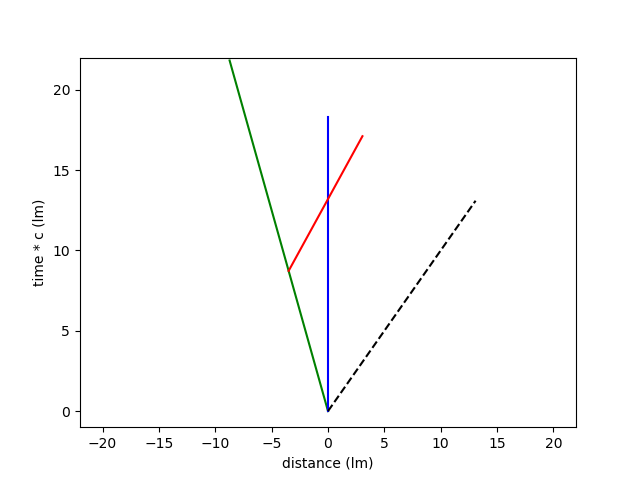

In [85]:
plotTransformedPath([earth_start, earth_end], shipA, "g")
plotTransformedPath([shipA_start, shipA_end], shipA, "b")
plotTransformedPath([shipB_start, shipB_end], shipA, "r")
plotTransformedPath([lightBeam_start, lightBeam_end], shipA, "k--")
